In [189]:
# IMPLEMENTATION OF DECISION TREE MODEL
# CASE: Predict if a banknote is real (1) or fake (0)
# IT IS A SUPERVISED MACHINE LEARNING PROBLEM 
#  You have labeled data:
# Your dataset includes:
# Input features: Variance, Skewness, Curtosis, Entropy
# A target label: Class (0 = fake, 1 = real)
#  known input-output pairs (X and y)
# binary classification problem
# first we import the data, pass the arguments

import pandas as pd
df = pd.read_csv("bill_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [190]:
# Let's look at the columns, rows size
df.shape

(1372, 5)

In [191]:
df.info()
#All columns have 1372 non-null values, meaning there are no missing values.
#The Variance, Skewness, Curtosis, and Entropy columns are continuous numerical features.
#The Class column is integer type, likely indicating a binary classification (e.g., 0 = fake note, 1 = real note

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [192]:
# with the output above we can conlude
#The dataset is clean (no missing values) Each column has the right number of entries
# the dataset is ready for exploratory data analysis (EDA) or feeding into a machine learning model


In [193]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [194]:
# 4 numerical features: Variance, Skewness, Curtosis, Entropy
# 1 target label: Class (likely 0 = fake, 1 = genuine)
# count: number of non-null values (all are 1372, so no missing data)
# mean: average of values
# std: standard deviation (spread of data)
# min / max: lowest and highest values
# 25% / 50% / 75%: percentiles (help understand distribution)

In [195]:
#df['Class'].value_counts() to check class distribution

#Visualizations (matplotlib, seaborn)

#Splitting into train/test sets for modeling

In [196]:
df['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [197]:
# Class 0 (likely fake banknotes): 762 instances
# Class 1 (likely real banknotes): 610 instances
# a binary classification problem.
#The dataset is slightly imbalanced, with about:
# 55.5% fake (Class 0)
# 44.5% real (Class 1)

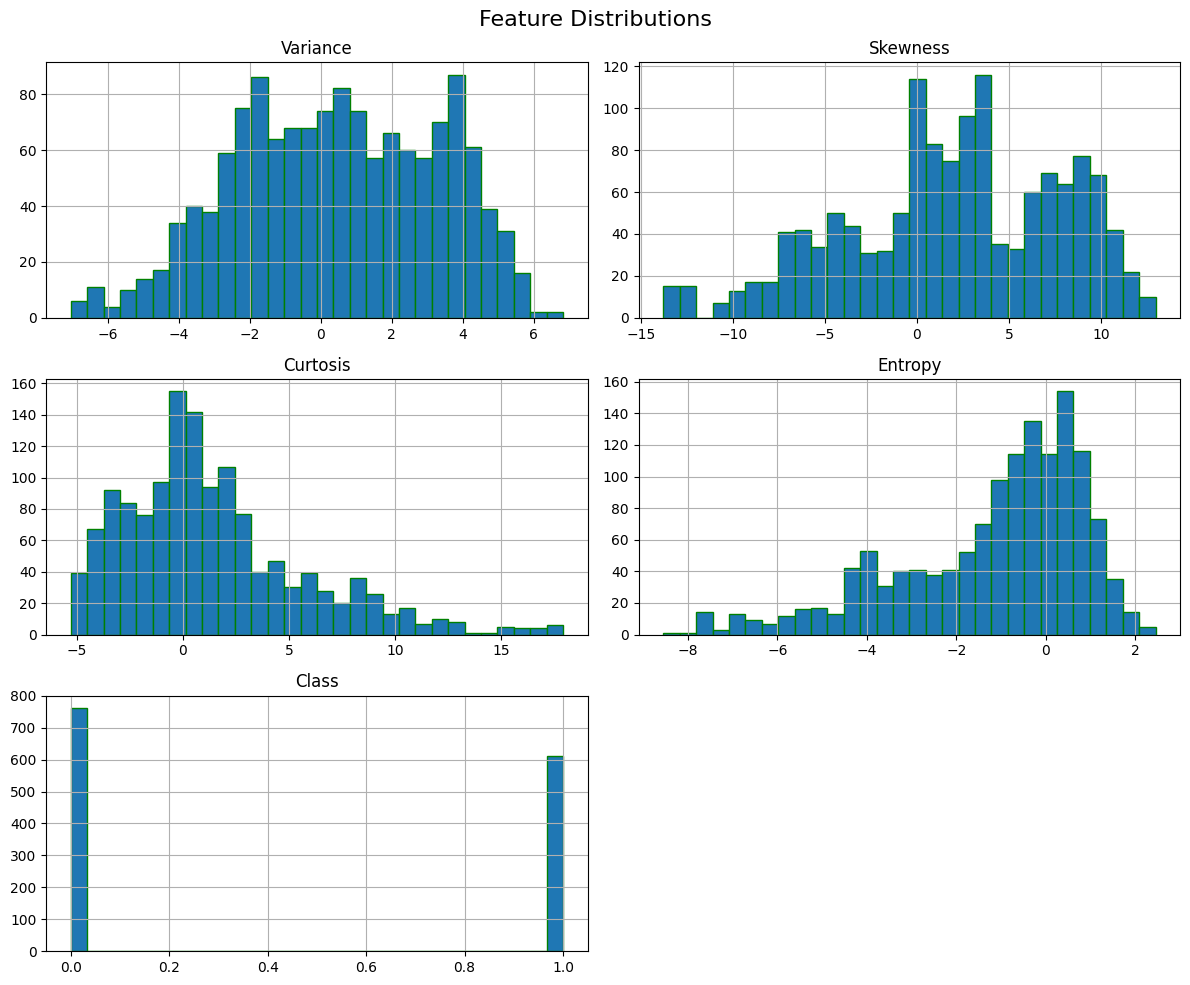

In [198]:
# now we want to have a general struture of the dataset using histogram
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=30, edgecolor='green')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [199]:
# calculate the entropy of the Class column, which measures the uncertainty or impurity in the class distribution. This is often used in decision trees and information theory
# Entropy formula for a binary variable:
# Note that probability value is equal or less than 1
# To do this Python we
import numpy as np
probabilities = df['Class'].value_counts(normalize=True)
print(probabilities)
#the proportion of the 0 and 1 entries also tell us their respective probabilities

Class
0    0.555394
1    0.444606
Name: proportion, dtype: float64


In [200]:
# Now the Shannon Entropy a measure of uncertainty or impurity in the Class column.
# Entropy tells you how mixed the classes are:
# Entropy = 0 → Pure class (e.g., all 0s or all 1s)
# Entropy = 1 (max) → Perfectly balanced classes (50/50)

entropy = -np.sum(probabilities * np.log2(probabilities))
# 0.555×log2(0.555) + 0.445×log2(0.445)

print(f"Entropy of the 'Class' column: {entropy:.4f}")

#.4f: .4 → round to 4 decimal places f → format as a fixed-point decimal number
#  The negative sign (-) Entropy is always a non-negative number, but the math naturally gives a negative sum, so we take the negative to make it positive
# If classes are fairly even (as yours are), the entropy is high (~0.99). If one class dominates, the entropy drops
# Why base 2? Because entropy is measured in bits when using log base 2

Entropy of the 'Class' column: 0.9911


In [201]:
# About 56% are fake, and 44% are real.
# The entropy is around 0.99, which is very close to 1.
# That means the dataset is fairly balanced, and there's a good mix of both classes
# knowing the entropy of the Class column gives us valuable insight into our data quality and readiness for machine learning
# ready to train and evaluate models like: Logistic Regression Decision Tree Random Forest Support Vector Machine (SVM) Neural Networks
# ✅ Our dataset has a good mix of real and fake notes.
#✅ The model won’t be biased from the start.
#✅ We're ready to train and get meaningful results

In [202]:
# NOW GINI
# Gini impurity is another way to measure how mixed or impure a dataset is, similar to entropy
# It ranges from 0 (pure: only one class) to 0.5 (maximum impurity: perfect 50/50 mix of two classes)

probabilities = df['Class'].value_counts(normalize=True)
gini = 1 - np.sum(probabilities**2)
print(gini)
# Gini=1 −(0.555**2 + 0.445**2)≈0.4949

0.49386310125882926


In [203]:
# Gini ≈ 0.495 means your dataset is fairly mixed — close to the max of 0.5.

In [204]:
# Now splitting the datasets
# X (features): the inputs used to predict
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = df['Class']

In [205]:
# TRAINING THE MODE
# First We split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# x_train, y_train: used to train the model (80% of the data)
# x_test, y_test: used to test how well the model performs (20%)

In [206]:
# try and check the shape

In [207]:
# *Now We build a Decision Tree Classifier to predict whether a banknote is real or fake using your data*
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt

y_pred = dt.predict(x_test)

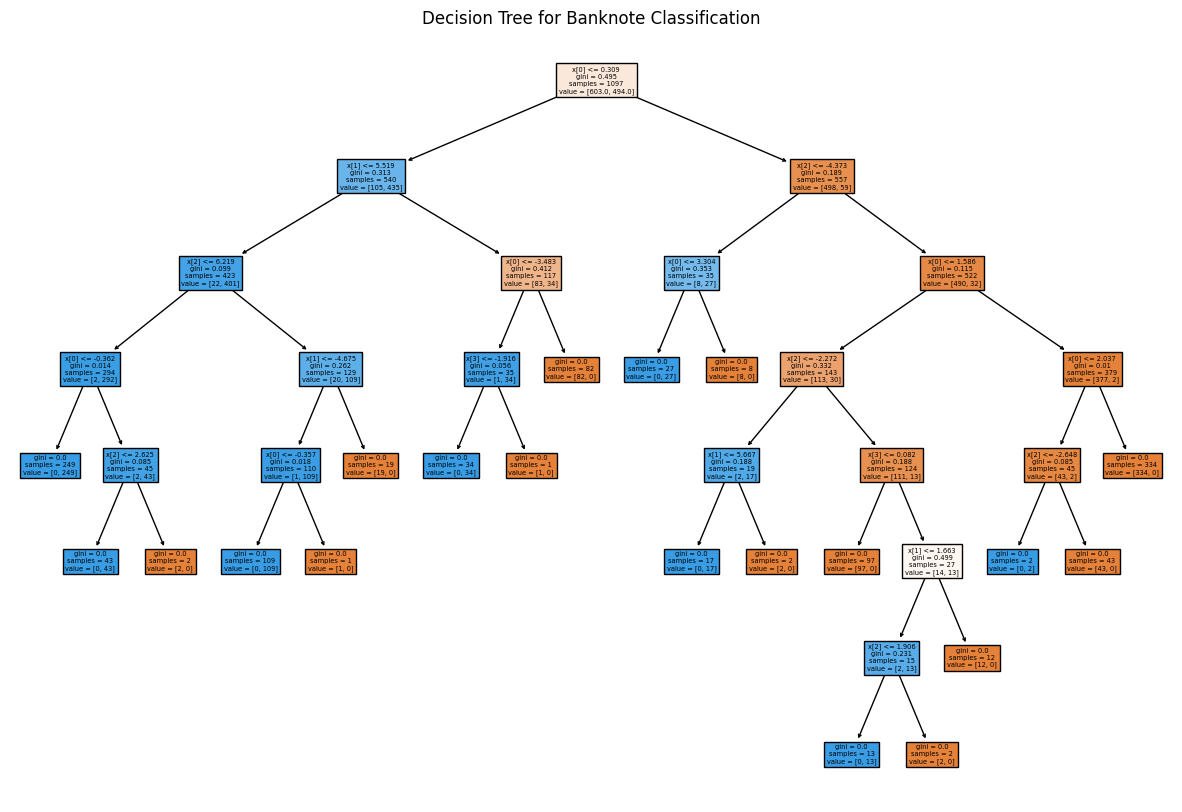

In [208]:
# Now let's have a look at the tree Built
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True)
plt.title("Decision Tree for Banknote Classification")
plt.show()

In [ ]:
# Tree Explanation
# Skewness <= 2.5
#│
#├── Entropy <= -1.0
#│   ├── Class: 0 (Fake)
#│   └── Class: 1 (Real)
#└── Class: 1 (Real)

# The model breaks decisions into simple questions like yes or no — for example, is the skewness below a certain number? — and based on those answers, it decides whether the banknote is real or fake
#Each node (box in the tree) asks a yes/no question about a feature:
#Like: Is Skewness <= 2.5?
#If yes, it follows the left branch
#If no, it goes right
#The goal is to split the data into groups that are mostly "Real" or mostly "Fake"


#Each box shows:
#The condition being tested
#The number of samples at that point
#The predicted class (0 = Fake, 1 = Real)
#The color (more intense = higher confidence)

#Skewness <= 2.5
#samples = 500
#class = 1 (Real)

# Another Explanation
# feature <= value
# gini = 0.48
# samples = 124
# value = [80, 44]
# class = 0

#feature <= value
#This is the decision being made at that node.
#Example: Skewness <= 1.5
#If true, follow the left branch.
#If false, follow the right branch.

#gini (Gini Impurity)
#A measure of how mixed the classes are in that node.
#Range: 0 (pure – only one class) to 0.5 (maximally mixed between two classes).
#So:
#gini = 0.0: all are either Real or Fake.
#gini = 0.5: perfect 50/50 mix (worst for classification)
# Lower gini is better — it means the node is more pure (leaning toward one class)


#value = [#, #]
#This shows how many samples belong to each class at that node:
#[Fake count, Real count] if class 0 = Fake and class 1 = Real.

#  samples
# The number of data points (banknotes) that reached that node.
# Helps you see how big each split is

#value = [80, 44]
#80 fake notes, 44 real notes at that point

#class = 0 or class = 1
#The predicted class at that node.
#It picks the class with the higher count in the value field


#Skewness <= 1.5
#gini = 0.43
#samples = 124
#value = [80, 44]
#class = 0
#At this point, we asked: is skewness ≤ 1.5? Out of 124 notes, 80 are fake and 44 are real. Since it's mostly fake, we predict class 0 (fake). The gini score of 0.43 shows that it's still a bit mixed, but leaning toward fake

#Skewness measures how asymmetrical your data is — in other words, whether your values lean more to the left or right from the average (mean).
# The average skewness in the data is 1.92, meaning many values are above 1. But in the decision tree, the model tries different skewness thresholds (like 1.5 or 2.2) to split the data where fake and real notes differ the most. These thresholds may or may not line up with the mean — they are chosen based on how well they help the model separate the classes

In [209]:
# The Default criteria is the default Gini impurity 
# Now we are creating another model using the criteria Entrapy with respect to the Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)

y_pred = dt_entropy.predict(x_test)

In [ ]:
# criterion='entropy' tells the decision tree to use Information Gain (based on entropy) to decide splits.
# By default, the tree uses criterion='gini' (Gini impurity).
# Entropy often leads to slightly different splits and sometimes better performance depending on the dataset

In [210]:
# what is left is to compute the information gain, evaluate the model
# INFORMATION GAIN
# Information Gain (IG) = Entropy(Parent) − Weighted Entropy(Children)
# Gini Gani also Gini(parent) - Weighted sum of Gini(children)

In [ ]:
#  evaluating the model performance using metrics like accuracy, precision, recall, F1-score, and the confusion matrix

In [211]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9891


In [ ]:
#it means your model correctly predicted the class of the banknote (real or fake) 98.91% of the time on the test dataset
#Suppose you had 100 test samples, your model would have correctly classified about 99 of them.
#This is a very high accuracy, which suggests:
#Your model learned the patterns well.
#The features (Variance, Skewness, etc.) are good predictors of whether a banknote is real or fake

In [ ]:
#Even with 98.91% accuracy, you still need to check
#Precision (how many predicted real were truly real)
#Recall (how many actual real were caught)
#F1-score (balance between precision and recall)
#Confusion matrix (to see specific errors)

In [212]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

precision: 0.9913
Recall:    0.9828
F1 Score:  0.9870


In [ ]:
# Precision: 99.13% When the model says a banknote is real, it's almost always right
#  Recall: 98.28% The model finds almost all real banknotes — it misses very few
# F1 Score: 0.9870 (98.70%) This is the harmonic average of precision and recall. It balances both — if one is low, F1 goes down too

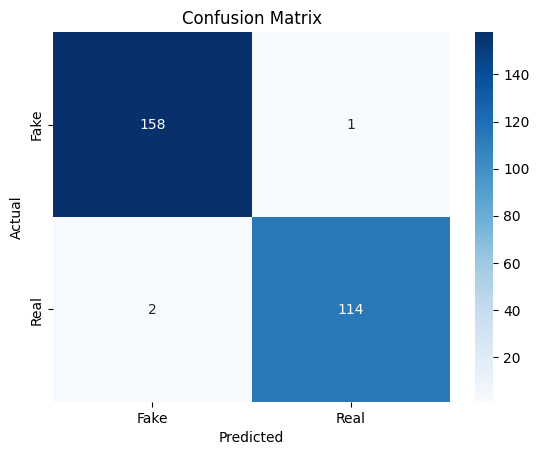

In [215]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# This code creates a confusion matrix to show how well your model did — in a simple 2x2 table. Then it uses a heatmap to make it easier to read
#  Predicted
#           Fake   Real
# Actual
# Fake       TN     FP
# Real       FN     TP

#Top-left (Fake/Fake) = Correctly predicted fake notes ✅
#Bottom-right (Real/Real) = Correctly predicted real notes ✅
#Top-right (Fake/Real) = Model said "real" but it was fake ❌ (False Positive)
#Bottom-left (Real/Fake) = Model said "fake" but it was real ❌ (False Negative)

# The matrix shows you what the model got right and where it made mistakes — so you can see if it's more likely to miss real notes or call fake notes real

In [214]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       159
        Real       0.99      0.98      0.99       116

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
# df = pd.read_csv('https://raw.githubusercontent.com/ReDI-School/data-analytics/master/Class%20material/Class-11_Data_cleaning/berlin_housing_with_scraped.csv')
# rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")

In [ ]:
# https://teams.microsoft.com/l/meetup-join/19%3ameeting_Zjc4MmQ5MDgtOWFhZC00OTY3LWIzNmQtOTYwNGY4MGVmZTA2%40thread.v2/0?context=%7b%22Tid%22%3a%225665ee7a-3634-4975-9c21-2778cda48edd%22%2c%22Oid%22%3a%22968576a8-37fa-4f09-9240-8d2b0b8308ab%22%7d


In [ ]:
# Fundamentals of Data Analytics
# url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'